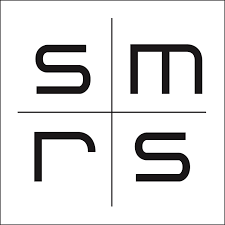

# Employer brand tracker dummy data maker

### Setup

In [54]:
# imports
# Some may need to be installed using '!pip install ...'

import pandas as pd
import numpy as np
from random import randint, choice
from faker import Faker
import datetime
from datetime import date
from sklearn.preprocessing import MinMaxScaler

In [55]:
# display settings for notebook
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.options.display.max_rows = 999

In [56]:
##### change this path to you own #####
path = '/Users/rachelcooper/Library/CloudStorage/OneDrive-SMRS/EB_Tracker/'

In [63]:
# change this to your client name
client = 'dummy'

### Use the below to generate data

In [59]:
# This generates random data within a specified range for each column.

# Initialize Faker
fake = Faker()

# Define job families
job_families = ['Engineering', 'Marketing', 'Sales', 'Human Resources', 'Finance', 'Product', 'Support']

# Define quarters
quarters = pd.date_range(start='2019-01-01', end='2021-12-31', freq='Q')

# Define function to generate random data
def generate_data():

    # Create empty columns ready to fill
    data = {
        'quarter': [],
        'job_family': [],
        'avg_applications': [],
        'recruitment_spend': [],
        'search_demand': [],
        'offers_extended': [],
        'cost_per_hire': [],
        'time_to_hire': [],
        'applications_per_post': [],
        'talent_pool_registrations': [],
        'attrition_rate': [],
        'probation_pass_rate': [],
        'avg_length_of_service': [],
        'glassdoor_4star_reviews': [],
        'avg_glassdoor_rating': [],
        'eNPS_score': [],
        'absenteeism_rate': [],
        'referal_rate': []
        
    }

    # Fill the columns with generated data
    for quarter in quarters:
        for job_family in job_families:
            data['quarter'].append(quarter) # add the quarter being iterated over in the for loop
            data['job_family'].append(job_family) # add the job family being iterated over in the for loop
            data['avg_applications'].append(randint(50, 200))
            data['recruitment_spend'].append(randint(5000, 20000))
            data['search_demand'].append(randint(0, 500))
            data['offers_extended'].append(randint(1, 50))
            data['cost_per_hire'].append(randint(1000, 5000))
            data['time_to_hire'].append(randint(0, 90))
            data['applications_per_post'].append(randint(1, 100))
            data['talent_pool_registrations'].append(randint(1000, 5000))
            data['attrition_rate'].append(np.random.uniform(0, 1))
            data['probation_pass_rate'].append(np.random.uniform(0, 1))
            data['avg_length_of_service'].append(randint(1, 10))
            data['glassdoor_4star_reviews'].append(np.random.uniform(0, 1))
            data['avg_glassdoor_rating'].append(np.random.uniform(1, 5))
            data['eNPS_score'].append(randint(-100,100))
            data['absenteeism_rate'].append(np.random.uniform(0,100))
            data['referal_rate'].append(np.random.uniform(0,100))

    return pd.DataFrame(data)

# Generate data
df = generate_data() # call the function above and assign it to 'df'

# export to .csv file in your folder with today's date
df.to_csv(f"{path}EB_dummydata_{date.today()}.csv", index=None)

df.head() # display the first 5 rows of data

,quarter,job_family,avg_applications,recruitment_spend,search_demand,offers_extended,cost_per_hire,time_to_hire,applications_per_post,talent_pool_registrations,attrition_rate,probation_pass_rate,avg_length_of_service,glassdoor_4star_reviews,avg_glassdoor_rating,eNPS_score,absenteeism_rate,referal_rate
0,2019-03-31,Engineering,80,18014,291,43,4425,36,58,4027,0.684419,0.644038,4,0.812832,3.183849,10,72.296084,80.751584
1,2019-03-31,Marketing,185,5371,45,29,1534,18,70,2626,0.147679,0.465809,8,0.708608,4.698734,-83,14.046008,96.733712
2,2019-03-31,Sales,168,5339,230,4,4842,28,16,2654,0.774187,0.051087,1,0.377807,4.352311,43,1.882933,64.960540
3,2019-03-31,Human Resources,117,6118,122,33,1698,19,92,3419,0.936846,0.827921,8,0.640112,2.664429,-67,1.733755,91.081452
4,2019-03-31,Finance,194,16722,266,40,3679,52,27,1546,0.020693,0.907995,4,0.187504,4.973083,-18,80.756318,23.430810


### to import data...

In [62]:
# df = pd.read_csv('') # enter your path and filename here

# df = pd.read_excel('') # or if its an excel file

### Use the below to normalise the data

In [67]:
# This will find and normalise all the numeric columns regardless of their position in the dataframe.

# choose the min - max scaler when 'scaler' is called below
scaler = MinMaxScaler()


# Create a MinMaxScaler
scaler = MinMaxScaler()

# Find numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Fit the scaler to your data and transform the data
normalized_data = scaler.fit_transform(df[numeric_cols])

# Make a copy of the original data
df_normalised = df.copy()

# Replace the numerical data with normalised data
df_normalised[numeric_cols] = normalized_data

# save the file to your path with today's date
df_normalised.to_csv(f"{path}EB_{client}_data_normalised_{date.today()}.csv", index=None) 

df_normalised.head() # show the first 5 rows

,quarter,job_family,avg_applications,recruitment_spend,search_demand,offers_extended,cost_per_hire,time_to_hire,applications_per_post,talent_pool_registrations,attrition_rate,probation_pass_rate,avg_length_of_service,glassdoor_4star_reviews,avg_glassdoor_rating,eNPS_score,absenteeism_rate,referal_rate
0,2019-03-31,Engineering,0.202703,0.869638,0.579268,0.857143,0.865390,0.400000,0.571429,0.765871,0.686311,0.655527,0.333333,0.826399,0.535199,0.550,0.724533,0.813968
1,2019-03-31,Marketing,0.912162,0.023556,0.079268,0.571429,0.106796,0.200000,0.693878,0.410107,0.136439,0.473840,0.777778,0.720213,0.923823,0.085,0.131570,0.977935
2,2019-03-31,Sales,0.797297,0.021415,0.455285,0.061224,0.974810,0.311111,0.142857,0.417217,0.778274,0.051070,0.000000,0.383185,0.834953,0.715,0.007754,0.651961
3,2019-03-31,Human Resources,0.452703,0.073546,0.235772,0.653061,0.149829,0.211111,0.918367,0.611478,0.944912,0.842979,0.777778,0.650428,0.401949,0.165,0.006236,0.919946
4,2019-03-31,Finance,0.972973,0.783176,0.528455,0.795918,0.669641,0.577778,0.255102,0.135856,0.006346,0.924606,0.333333,0.189300,0.994204,0.410,0.810655,0.225891
